# IMOS Data access with Python

_This notebook is based on the examples from the IMOS based Python library [tutorial](https://github.com/aodn/imos-user-code-library/wiki/Using-the-IMOS-User-Code-Library-with-Python#12-finding-an-imos-netcdf-file)._

:::{note}

In this first example (`OceanData1.ipynb`), we will work with the [IMOS portal](https://portal.aodn.org.au/search) using [Python](https://www.python.org) via [Jupyter Notebooks](https://jupyter.org). 

There are several advantages of using `Python` as a general data analysis language and the notebook environment is a versatile tool that is designed to be *interactive*, *user-friendly*, *open-source* and *sharable*.

:::


```{figure} ../_static/imos.png
---
figclass: margin
name: margin_figure22
---
```

We will see how to load `NetCDF` data into a `Python` environment, and show how to use the data once loaded.

In [1]:
# from IPython.display import YouTubeVideo
# YouTubeVideo('7yTpv70gkGE', width=760, height=450)

:::{note}
First we will load **IMOS** **NetCDF**, and see how to quickly use the data once loaded. 

For this example, we will rely on the **netCDF4 Python** library (http://code.google.com/p/netcdf4-python/)
:::

:::{attention}
The examples provided in this document only represent a tiny bit of the content of most of the NetCDF files. There are usually many more variables available in a NetCDF file, and therefore many other ways to display data.
:::

**Content:**
- [Installation of the IMOS User Code Library (Python) and required packages](#install-imos)
- [Finding an IMOS NetCDF file](#netcdf-imos)
- [General Features of the netCDF4 module](#netcdf4)
- [Output structure](#output)
- [Discover Metadata](#metadata)
- [Discover Variables](#variables)
- [Export the salinity variable](#salinity)
- [Plotting the Salinity-Temperature relationship](#plotting)

***

````{margin}
```{seealso}
A list of interesting IMOS based Python library functions is available from their [Github website](https://github.com/aodn/imos-user-code-library/wiki/Using-the-IMOS-User-Code-Library-with-Python#12-finding-an-imos-netcdf-file).
```
````

## <a name="install-imos"></a>  Installation of the IMOS User Code Library (Python) and required packages

The examples that will be used rely on the following `Python` packages, which have already been installed:

+ **`numpy`** – standard package for scientific computing in Python, provides versatile numerical array objects (http://www.numpy.org/).
+ **`matplotlib`** – for plotting (http://matplotlib.org/).
+ **`netCDF4`** – for accessing netCDF files (http://code.google.com/p/netcdf4-python/).

## <a name="netcdf-imos"></a>  Finding an IMOS NetCDF File

In order to find a dataset you are interested in, please refer to the portal help: http://help.aodn.org.au/help/?q=node/6. This is a *how-to guide* that can help users find an IMOS NetCDF file. When downloading chosen dataset from the portal, one will have to choose one of the download options “List of URLs”, or “All source NETCDF files” to obtain netCDF files.

For users who are already familiar with IMOS facilities and datasets, IMOS NetCDF files are also directly accessible via an OPeNDAP catalog at : http://thredds.aodn.org.au/thredds/catalog/IMOS/catalog.html

Here we will use the ‘Data URL’ of a dataset. If you have downloaded your dataset from the portal, the data URL is the file path to the file on your local machine. If you are using the THREDDS catalog, the file does not have to be downloaded to your local machine first – the OPeNDAP data URL can be parsed into Python. 

The OPeNDAP data URL is found on the ‘OPeNDAP Dataset Access Form’ page (see http://help.aodn.org.au/help/?q=node/11), inside the box labelled ‘Data URL’ just above the ‘Global Attributes’ field.

:::{note}
The list of URL’s generated by the IMOS portal when choosing that download option can be converted to a list of OPeNDAP data URL’s by replacing string http://data.aodn.org.au/IMOS/opendap with http://thredds.aodn.org.au/thredds/dodsC/IMOS.
:::

## <a name="netcdf4"></a>  General Features of the netCDF4 module

The first step consists of opening the NetCDF file, whether this file is available locally or remotely on an **OPeNDAP** server.

This is done by running the commands shown in the cell below and it creates a `netCDF` Dataset object, through which you can access all the contents of the file.

In [2]:
from netCDF4  import Dataset

aatams_URL = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/eMII/demos/AATAMS/marine_mammal_ctd-tag/2009_2011_ct64_Casey_Macquarie/ct64-M746-09/IMOS_AATAMS-SATTAG_TSP_20100205T043000Z_ct64-M746-09_END-20101029T071000Z_FV00.nc'
aatams_DATA = Dataset(aatams_URL)

## <a name="output"></a>  Output structure

Please refer to the netCDF4 module documentation for a complete description of the `Dataset` object:: 'http://netcdf4-python.googlecode.com/svn/trunk/docs/netCDF4.Dataset-class.html' (or type help(Dataset) at the Python prompt).

In [3]:
help(aatams_DATA)

Help on Dataset object:

class Dataset(builtins.object)
 |  A netCDF [Dataset](#Dataset) is a collection of dimensions, groups, variables and
 |  attributes. Together they describe the meaning of data and relations among
 |  data fields stored in a netCDF file. See [Dataset.__init__](#Dataset.__init__) for more
 |  details.
 |  
 |  A list of attribute names corresponding to global netCDF attributes
 |  defined for the [Dataset](#Dataset) can be obtained with the
 |  [Dataset.ncattrs](#Dataset.ncattrs) method.
 |  These attributes can be created by assigning to an attribute of the
 |  [Dataset](#Dataset) instance. A dictionary containing all the netCDF attribute
 |  name/value pairs is provided by the `__dict__` attribute of a
 |  [Dataset](#Dataset) instance.
 |  
 |  The following class variables are read-only and should not be
 |  modified by the user.
 |  
 |  **`dimensions`**: The `dimensions` dictionary maps the names of
 |  dimensions defined for the [Group](#Group) or [Dataset]

## <a name="metadata"></a> Discover the metadata

In order to see all the global attributes and some other information about the file, type in your command window:

In [4]:
print(aatams_DATA)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    project: Integrated Marine Observing System (IMOS)
    conventions: IMOS-1.2
    date_created: 2012-09-13T07:27:03Z
    title: Temperature, Salinity and Depth profiles in near real time
    institution: AATAMS
    site: CTD Satellite Relay Data Logger
    abstract: CTD Satellite Relay Data Loggers are used to explore how marine mammal behaviour relates to their oceanic environment. Loggers developped at the University of St Andrews Sea Mammal Research Unit transmit data in near real time via the Argo satellite system
    source: SMRU CTD Satellite relay Data Logger on marine mammals
    keywords: Oceans>Ocean Temperature>Water Temperature ;Oceans>Salinity/Density>Conductivity ;Oceans>Marine Biology>Marine Mammals
    references: http://imos.org.au/aatams.html
    unique_reference_code: ct64-M746-09
    platform_code: Q9900335
    netcdf_version: 3.6
    naming_authority: IMOS
    quality_c

:::{tip}
Global attributes in the `netCDF` file become attributes of the `Dataset` object. 

A list of global attribute names is returned by the ncattrs() method of the object. The __dict__ attribute of the object is a dictionary of all netCDF attribute names and values.
:::

In [5]:
# store the dataset's title in a local variable
title_str = aatams_DATA.title

# list all global attribute names
aatams_DATA.ncattrs()

['project',
 'conventions',
 'date_created',
 'title',
 'institution',
 'site',
 'abstract',
 'source',
 'keywords',
 'references',
 'unique_reference_code',
 'platform_code',
 'netcdf_version',
 'naming_authority',
 'quality_control_set',
 'cdm_data_type',
 'geospatial_lat_min',
 'geospatial_lat_max',
 'geospatial_lat_units',
 'geospatial_lon_min',
 'geospatial_lon_max',
 'geospatial_lon_units',
 'geospatial_vertical_min',
 'geospatial_vertical_max',
 'geospatial_vertical_units',
 'time_coverage_start',
 'time_coverage_end',
 'data_centre_email',
 'data_centre',
 'author',
 'author_email',
 'institution_references',
 'principal_investigator',
 'citation',
 'acknowledgment',
 'distribution_statement',
 'file_version',
 'file_version_quality_control',
 'metadata_uuid',
 'body_code',
 'ptt_code',
 'species_name',
 'release_site',
 'sattag_program',
 'EXTRA_DIMENSION.length_char']

We can store the complete set of attributes in a dictionary (`OrderedDict`) object (similar to a standard Python `dict`, but
which maintains the order in which items are entered):

In [6]:
globalAttr = aatams_DATA.__dict__

In [7]:
globalAttr

OrderedDict([('project', 'Integrated Marine Observing System (IMOS)'),
             ('conventions', 'IMOS-1.2'),
             ('date_created', '2012-09-13T07:27:03Z'),
             ('title',
              'Temperature, Salinity and Depth profiles in near real time'),
             ('institution', 'AATAMS'),
             ('site', 'CTD Satellite Relay Data Logger'),
             ('abstract',
              'CTD Satellite Relay Data Loggers are used to explore how marine mammal behaviour relates to their oceanic environment. Loggers developped at the University of St Andrews Sea Mammal Research Unit transmit data in near real time via the Argo satellite system'),
             ('source',
              'SMRU CTD Satellite relay Data Logger on marine mammals'),
             ('keywords',
              'Oceans>Ocean Temperature>Water Temperature ;Oceans>Salinity/Density>Conductivity ;Oceans>Marine Biology>Marine Mammals'),
             ('references', 'http://imos.org.au/aatams.html'),
          

In [8]:
# now you can also do (same effect as first command above)
title_str = globalAttr['title']
print(title_str)

Temperature, Salinity and Depth profiles in near real time


## <a name="variables"></a> Discover Variables

To list all the variables available in the `NetCDF` file, type:

In [9]:
aatams_DATA.variables.keys()

odict_keys(['TIME', 'LATITUDE', 'LONGITUDE', 'TEMP', 'PRES', 'PSAL', 'parentIndex', 'TIME_quality_control', 'LATITUDE_quality_control', 'LONGITUDE_quality_control', 'TEMP_quality_control', 'PRES_quality_control', 'PSAL_quality_control'])

Each variable is accessed via a `Variable` object, in a similar way to the `Dataset` object. To access the `Temperature` variable :

In [11]:
TEMP = aatams_DATA.variables['TEMP']

# now you can print the variable's attributes and other info
print(TEMP)

<class 'netCDF4._netCDF4.Variable'>
float64 TEMP(obs)
    standard_name: sea_water_temperature
    long_name: sea_water_temperature
    units: Celsius
    valid_min: -2.0
    valid_max: 40.0
    _FillValue: 9999.0
    ancillary_variables: TEMP_quality_control
unlimited dimensions: 
current shape = (12987,)
filling off


Accessing variable attributes, _e.g._ its standard_name for example

In [13]:
TEMP.standard_name

'sea_water_temperature'

Extract the data values (as a `Numpy` Masked Array)

In [21]:
temperature = TEMP[:]
print('Values:',temperature)
print('Min:',min(temperature),' Max:',max(temperature))
print(type(temperature))

Values: [7.644  7.6322 7.6243 ... 5.4599 5.1781 4.4438]
Min: -1.855  Max: 8.136
<class 'numpy.ma.core.MaskedArray'>


## <a name="salinity"></a> Export the salinity variable

Following the same approach as the one proposed for the temperature variable extract the salinity one.


In [22]:
# netCDF4 Variable object
PSAL = aatams_DATA.variables['PSAL']

# now you can print the variable's attributes and other info
print(PSAL)

# access variable attributes, e.g. its standard_name
PSAL.standard_name

# extract the data values (as a numpy array)
salinity = PSAL[:]

<class 'netCDF4._netCDF4.Variable'>
float64 PSAL(obs)
    standard_name: sea_water_salinity
    long_name: sea_water_salinity
    units: 1e-3
    _FillValue: 9999.0
    ancillary_variables: PSAL_quality_control
unlimited dimensions: 
current shape = (12987,)
filling off


In [23]:
print('Values:',salinity)
print('Min:',min(salinity),' Max:',max(salinity))

Values: [34.004  34.0069 34.0058 ... 34.1937 34.252  34.2277]
Min: 33.148  Max: 34.766


## <a name="plotting"></a> Plotting the Salinity-Temperature relationship

We can now work with and plot  these variables and get some information/relationship regarding their temporal and/or spatial evalution for example.

To do so we need to import some useful Python libraries...

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['mathtext.fontset'] = 'cm'

We then use a smoothing function `lowess` [Locally Weighted Scatterplot Smoothing](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) to get a general trend of salinity evolution in relation to temperature from the existing scattered dataset.

In [26]:
ys = lowess(salinity, temperature, it=5, frac=0.2)

Now we plot the result with **matplotlib**:

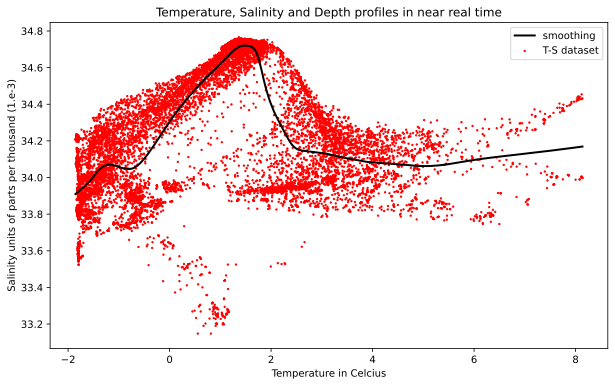

In [28]:
plt.figure(figsize=(10,6))

plt.scatter(temperature, salinity,  s=2,  marker='o', facecolor='r', lw = 1,label='T-S dataset')
plt.xlabel('Temperature in Celcius')
plt.ylabel('Salinity units of parts per thousand (1.e-3)')
plt.title(title_str)

plt.plot(ys[:,0],ys[:,1],'k',linewidth=2,label='smoothing')

plt.legend(loc=0, fontsize=10)
plt.show()
plt.close()